# **Neural Network - A Simple Perceptron --- Assignment**


**Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.**

Deep learning is a subset of machine learning that utilizes artificial neural networks with multiple hidden layers (deep neural networks) to learn complex patterns and representations of data, such as images, text, and sound.

It evolved from earlier artificial neural networks as increased computing power (like GPUs) and vast amounts of available data made training deeper models feasible.

The key difference from traditional machine learning is that while traditional methods often require manual feature engineering (telling the model which specific features to look for), deep learning models automate this process by automatically discovering relevant features from raw data. This enables deep learning to handle highly complex, unstructured data tasks like image recognition and natural language processing with state-of-the-art performance.

**Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?**

A Perceptron is a basic neural network unit that takes inputs, multiplies them by weights, sums them up (plus a bias), and passes the result through an activation function to produce a binary output (0 or 1) for classification, learning by adjusting weights to separate data with a linear boundary.

Its major limitation is that it can only solve linearly separable problems (like AND/OR gates) and fails with complex, non-linear data, such as the XOR problem, requiring multi-layered networks (MLPs) for more advanced tasks.

**Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.**

Activation functions introduce non-linearity, enabling neural networks to learn complex patterns beyond simple linear relationships, deciding if a neuron should "fire" or not.

Sigmoid squashes to (0,1) for probabilities, Tanh squashes to (-1,1) (zero-centered), and ReLU outputs input directly for positives (0 for negatives), making it computationally efficient and popular for deep networks, though it can suffer from 'dying ReLUs'

**Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.**

A Loss function measures error for a single data point (e.g., one prediction), while a Cost function aggregates these losses over the entire dataset (or a batch) into a single value to guide optimization (like Gradient Descent).  

**Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.**

Optimizers in neural networks adjust model weights to minimize loss, with Gradient Descent (GD) being basic, while Adam and RMSprop are advanced adaptive methods: GD updates weights by the gradient's direction (slow/oscillation issues); RMSprop scales learning rates per parameter using squared gradients (adapts well); and Adam combines RMSprop's adaptation with momentum (first and second moments) for fast, robust convergence, often outperforming others by balancing speed and stability.

● Use NumPy, Matplotlib, and Tensorflow/Keras for implementation.

**Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.**

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _step_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._step_function(linear_output)

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predictions = np.array([self._step_function(output) for output in linear_output])
        return y_predictions

# Logical AND gate data
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1])

# Create and train the perceptron
perceptron_and = Perceptron(learning_rate=0.1, n_iterations=10)
perceptron_and.fit(X_and, y_and)

# Test the perceptron
predictions_and = perceptron_and.predict(X_and)

print("Predictions for AND gate:")
for i in range(len(X_and)):
    print(f"Input: {X_and[i]}, Expected: {y_and[i]}, Predicted: {predictions_and[i]}")

# Verify accuracy
accuracy_and = np.mean(predictions_and == y_and)
print(f"Accuracy for AND gate: {accuracy_and * 100:.2f}%")

Predictions for AND gate:
Input: [0 0], Expected: 0, Predicted: 0
Input: [0 1], Expected: 0, Predicted: 0
Input: [1 0], Expected: 0, Predicted: 0
Input: [1 1], Expected: 1, Predicted: 1
Accuracy for AND gate: 100.00%


**Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.**

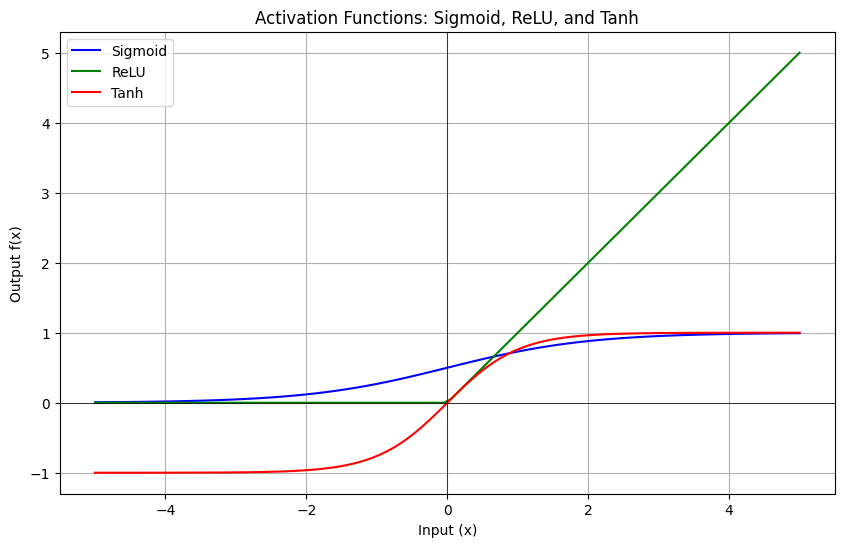

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate input values
x = np.linspace(-5, 5, 100)

# Calculate output for each activation function
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Visualize the activation functions
plt.figure(figsize=(10, 6))

plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.plot(x, y_relu, label='ReLU', color='green')
plt.plot(x, y_tanh, label='Tanh', color='red')

plt.title('Activation Functions: Sigmoid, ReLU, and Tanh')
plt.xlabel('Input (x)')
plt.ylabel('Output f(x)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

**Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.**

In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(128, activation='relu'),   # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),    # Another hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 digits) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    verbose=1)

# Print the training accuracy of the last epoch
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8738 - loss: 0.4312
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9676 - loss: 0.1089
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9775 - loss: 0.0729
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9834 - loss: 0.0528
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9872 - loss: 0.0405
Training Accuracy: 0.9865


**Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7551 - loss: 0.7049 - val_accuracy: 0.8497 - val_loss: 0.4233
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8514 - loss: 0.4131 - val_accuracy: 0.8540 - val_loss: 0.4156
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8711 - loss: 0.3599 - val_accuracy: 0.8607 - val_loss: 0.3833
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8769 - loss: 0.3448 - val_accuracy: 0.8764 - val_loss: 0.3515
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8841 - loss: 0.3154 - val_accuracy: 0.8799 - val_loss: 0.3400
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8926 - loss: 0.2961 - val_accuracy: 0.8817 - val_loss: 0.3347
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6

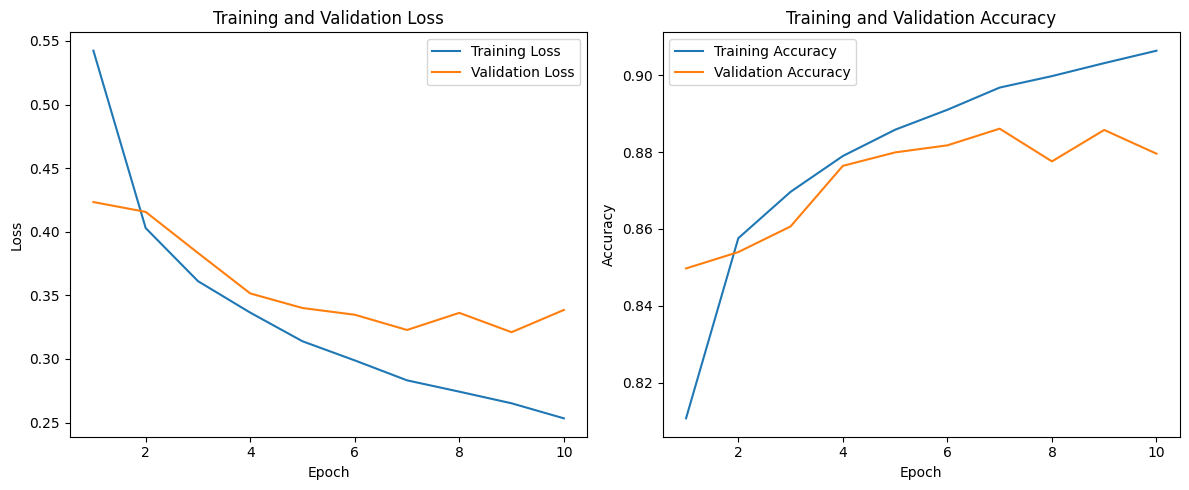

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load and Preprocess the Dataset ---
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# --- 2. Build and Compile the Model ---
model = Sequential([
    Flatten(input_shape=(28, 28)), # Flattens the 28x28 images into a 784-pixel vector
    Dense(128, activation='relu'), # A dense layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # A dense layer with 10 output neurons (one for each class) and softmax activation
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- 3. Train the Model and Store History ---
# We use a validation split to monitor performance on unseen data during training
history = model.fit(train_images, train_labels, epochs=10,
                    validation_split=0.2, # Uses 20% of the training data for validation
                    batch_size=64, verbose=1)

# --- 4. Plot Loss and Accuracy Curves ---
def plot_curves(history):
    # Extract metrics from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs_range = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_curves(history)

Question 10: You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate.

Explain your real-time data science workflow:
- How would you design a deep learning model (perceptron or multilayer NN)?
- Which activation function and loss function would you use, and why?
- How would you train and evaluate the model, considering class imbalance?
- Which optimizer would be suitable, and how would you prevent overfitting?

To detect fraudulent transactions in real-time, the workflow involves designing a shallow Multilayer Perceptron (MLP) to ensure low latency.

Use the ReLU activation function in hidden layers for efficient gradient flow, and the Binary Cross-Entropy loss function for binary classification.

Address the large, imbalanced dataset during training using techniques like class weights or oversampling, and utilize Precision-Recall AUC for relevant evaluation.

Employ an adaptive optimizer such as Adam for efficient convergence, and implement L1/L2 regularization and dropout layers to prevent overfitting. The deployed model must be robust and provide quick inferences to flag potential fraud instantly